**NOTA**

Los ejercicios de este notebook componen la Tarea5, para la que las fechas relevantes son:

**Envío del PR inicial:** lunes 17 de octubre

**Aceptación del PR:** lunes 31 de octubre


# Exponente(s) de Lyapunov

Una manera de caracterizar el caos en el sentido de *sensibilidad a condiciones iniciales* es a través de los exponentes de Liapunov. La idea es sencilla: si hay una separación *exponencial* de condiciones iniciales muy cercanas, entonces diremos que hay caos.

Por esto, simplemente monitoreamos la evolución de dos condiciones iniciales cercanas, $x_0$ y $x_0+\epsilon$, donde $\epsilon>0$ y pequeño.

Considerando mapeos en una dimensión, la distancia entre los iterados $n$ es

\begin{equation}
D_n = \big|\, f^{n}(x_0+\epsilon)-f^{n}(x_0) \big|\,.
\end{equation}

Entonces, suponiendo que $d_n$ tiene una dependencia exponencial de $n$, para $n\to\infty$ y $\epsilon\to 0$, escribimos $d_n= \epsilon \exp(\lambda n)$, de donde obtenemos

\begin{equation}
\lambda(x_0) \equiv \lim_{n\to\infty} \lim_{\epsilon\to 0} 
\frac{1}{n}\log\Big| \frac{f^{n}(x_0+\epsilon)-f^{n}(x_0)}{\epsilon}\Big|.
\end{equation}

A $\lambda(x_0)$ se le llama exponente de Lyapunov. Si $\lambda(x_0)>0$ diremos que hay caos, mientras que si $\lambda(x_0)<0$ diremos que no lo hay.

Observaciones:

- El exponente de Liapunov, estrictamente hablando, depende de la condición inicial $x_0$.

- En la definición del exponente de Lyapunov se require la evaluación de **dos** límites, uno que involucra al tiempo ($n\to\infty$), y otro a la condición inicial ($\epsilon\to 0$).

- La definición del exponente de Lyapunov es sutil, ya que en muchas ocasiones *sabemos* que el rango de $f(x)$ y de $f^n(x)$ es acotado cuando $x$ está en cierto dominio, lo que entonces podría llevar erróneamente a concluir que $\lambda(x_0)=0$. (La sutileza está en que el órden de los límites no conmuta.)

Si el mapeo $f(x)$ es suficientemente suave, entonces podemos escribir

\begin{equation}
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n}\log\Big| \frac{{\rm d} f^{n}}{{\rm d}x}(x_0)\Big|,
\end{equation}

Usando que

\begin{equation}
\frac{{\rm d}f^n}{{\rm d}x}(x_0) = f'(x_0) f'(x_1)\dots f'(x_{n-1}) 
= \prod_{i=1}^{n} f'(x_i), 
\end{equation}

donde $x_i=f^i(x_0)$
obtenemos

\begin{equation}
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n} \sum_{i=1}^n \log
\Big| \, f'(x_i)\, \Big|.
\end{equation}


**Ejercicio 1:**

Obtengan, para la familia de mapeos cuadrática $Q_c(x)$, el diagrama que muestra el exponente de Lyapunov en términos de $c$.

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) para los valores
de $c$ donde hay bifurcaciones?

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) cuando tenemos *ciclos superestables*, es decir, cuando $x=0$ es parte de un ciclo periódico?

In [1]:
using Plots

using LaTeXStrings

pyplot(grid=:false, legend=:false, size=(400,267))

Plots.PyPlotBackend()

In [2]:
Q_c(x,c) = x^2 + c
Q_c´(x) = 2*x

Q_c´ (generic function with 1 method)

In [3]:
function iterator(f::Function, n::Int, k, x0, c)

    solution = Float64[]
    #steps = Int[0]
    x_old = x0
    for i in 1:n

        x_new = f(x_old, c)
        x_old = x_new

    end
    
    for i in 1:k
        
        x_new = f(x_old, c)
        push!(solution, x_old)
        x_old = x_new

    end
    
    return solution

end

iterator (generic function with 1 method)

In [4]:
function liapunov_exponent(Xi)
    
    σ = 0.0
    n = length(Xi)
    
    for i in 1:n
        
        σ += log(abs(Q_c´(Xi[i])))
        
    end
    
    λ = 1/n * σ
    
end

liapunov_exponent (generic function with 1 method)

In [5]:
orb_1 = iterator(Q_c, 100, 1000, 0.0, -1.5)

1000-element Array{Float64,1}:
 -0.248334 
 -1.43833  
  0.568794 
 -1.17647  
 -0.115911 
 -1.48656  
  0.709875 
 -0.996078 
 -0.507829 
 -1.24211  
  0.0428369
 -1.49817  
  0.744498 
  ⋮        
 -0.0567696
 -1.49678  
  0.740342 
 -0.951894 
 -0.593898 
 -1.14728  
 -0.183738 
 -1.46624  
  0.649861 
 -1.07768  
 -0.338604 
 -1.38535  

In [6]:
liapunov_exponent(orb_1) # Caos

0.25999766464274

In [7]:
orb_2 = iterator(Q_c, 100, 1000, 0.0, -1.2)
liapunov_exponent(orb_2) #no chaos

-0.11157177942474457

In [8]:
orb_3 = iterator(Q_c, 15000, 14500, 0.0, -1.401)
lia_3 = liapunov_exponent(orb_3) #no chaos

-0.018692862862578284

In [9]:
orb_4 = iterator(Q_c, 15000, 10000, 0.0, -.75001)
liapunov_exponent(orb_4) #no chaos

-8.268402498618143e-5

In [10]:
orb_5 = iterator(Q_c, 15000, 1500, 0.0, -1.25)
lia_5 = liapunov_exponent(orb_5) #no chaos

-9.53977020732341e-5

In [11]:
function liapunov_c_range(c_range)
    
    liapunov = Float64[]
    
    for i in c_range
        
        orb = iterator(Q_c, 100, 1000, 0.0, i)
        exponent = liapunov_exponent(orb)
        push!(liapunov, exponent)
        
    end
    
    liapunov
    
end     

liapunov_c_range (generic function with 1 method)

In [12]:
c_rango = 0.25:-0.001:-2.0
liap_exponentes = liapunov_c_range(c_rango);

[Plots.jl] Initializing backend: pyplot



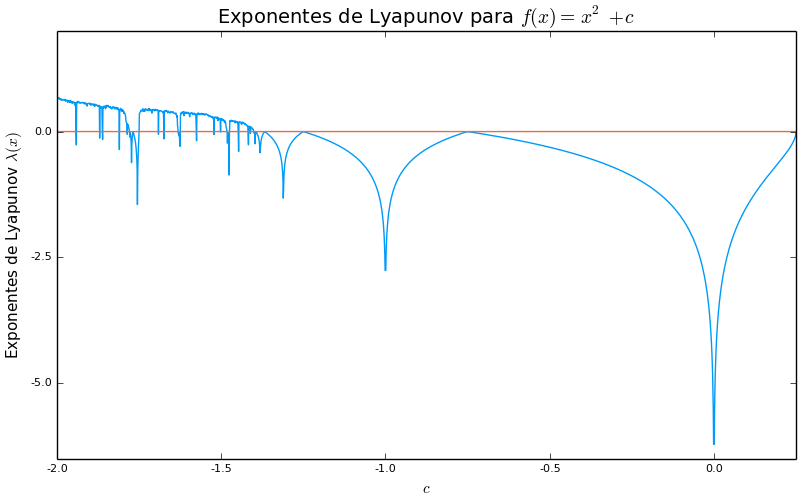

In [13]:
plot(c_rango, liap_exponentes, ylim=(-6.5, 2), size=(800, 500), xlabel=(L"$c$"), 
    ylabel = (L"Exponentes de Lyapunov $\lambda(x)$"),
    title=(L"Exponentes de Lyapunov para $f(x) = \ x^2 + c$"))

plot!(c_rango, zeros(length(liap_exponentes)))

**Respuesta**

> Observamos que para valores de c donde hay bifurcaciones se alcanza el valor 0. Esto se debe a que las derivadas se van acercando a cero justo antes de darse el punto de bifurcación, y ahi justo se ve un 'pico', en esencia las dos derivadas correspondientes a la bifurcación.

> Sin embargo, en los ciclos superestables vemos que hay una brutal tendencia hacia $-\infty$ en los valores de los exponentes -- esto lo podemos atribuir a que los sitios que rodean acaban siendo atraídos.


# Universalidad

Anteriormente, obtuvimos el siguiente diagrama de bifurcaciones de la familia cuadrática:

![](diag_bifurcaciones.png)

En esta sección, analizaremos por qué ciertos aspectos de la dinámica son universales (como por ejemplo los exponentes de Feigenbaum), es decir, para una familia más amplia de mapeos, más allá de la cuadrática. Aún así, analizaremos este aspecto para la familia cuadrática.

El argumento que se presenta será más bien cualitativo; sin embargo, las observaciones que aquí se harán se pueden poner en términos rigurosos, que se conocen como la teoría de renormalización.

## Ciclos superestables

Para la familia de mapeos cuadráticos $Q_c(x) = x^2+c$, un punto particular es $x=0$, simplemente porque en $x=0$ se satisface $Q_c'(x=0)=0$ para todo valor de $c$. 
Por esto es que definiremos un *ciclo superestable* de periodo $n$ como aquél en que $x=0$ forma parte del órbita periódica de periodo $n$.

Es fácil ver que en $c_0=0$ se tiene un ciclo superestable periódico de periodo 1. En este caso, uno puede sustituir $c=0$ en $Q_c(x)$, y notar que $Q_{c=0}(x)=x$ se cumple para $x=0$.

In [15]:
"Mapeo cuadrático evaluado en `x`, con parámetro `c`"
Qc(x,c) = x^2 + c
Qc(x, args...) = !c(x, args[1])

"Derivada de `Qc(x,c)` respecto a `x` evaluada en `x`, con parámetro `c`"
Qc´(x,c) = 2x

Qc´ (generic function with 1 method)

In [16]:
C0 = 0.0

0.0

In [17]:
Qc(0.0,C0) == 0.0

true

In [18]:
doc"""
    Qcⁿ(x, args)

Esta función define el n-enésimo iterado de $Qc(x,c)$,
donde el valor a iterar es `x` y el valor del parámetro
es `c`, donde `c = args[1]` y `n = args[2]`.
"""
function Qcⁿ(x, args)
    c, n = args[1], args[2]
    @assert n >= 0 && isa(n,Int)
    n <= 1 && return Qc(x,c)
    for it = 1:n
        x = Qc(x,c)
    end
    return x
end

Qcⁿ (generic function with 1 method)

La siguiente gráfica muestra el mapeo $Q_c(x)$ para $c=C_0$.


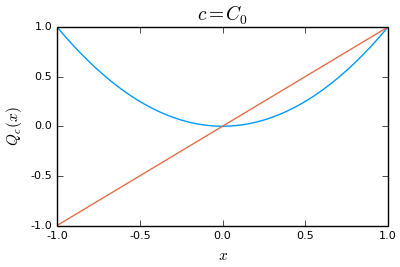

In [19]:
xrange = -1:1/64:1
plot(xrange, x->Qcⁿ(x, (C0,1)))
plot!(xrange, x->x)
ylims!(-1,1)
xlabel!(L"x")
ylabel!(L"Q_c(x)")
title!(L"c = C_0")

Para obtener el valor $c_1$ del ciclo superestable de periodo 2, debemos encontrar la $c$ tal que 

\begin{equation}
Q_c^2(0) = c^2+c = c(c+1) = 0,
\end{equation}

cuya solución, distinta de $c_0=0$, es $c_1=-1$.

In [20]:
C1 = -1.0

-1.0


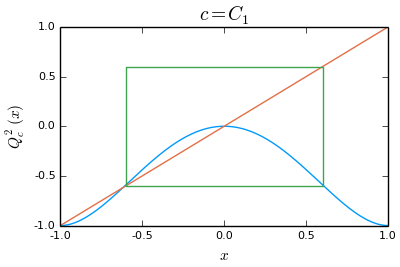

In [21]:
xrange = -1:1/64:1
plot(xrange, x->Qcⁿ(x, (C1,2)))
plot!(xrange, x->x)
ylims!(-1,1)

x₁ = -0.6
plot!([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])
xlabel!(L"x")
ylabel!(L"Q_c^2(x)")
title!(L"c = C_1")

El recuadro verde en la gráfica de $C_1$ muestra un detalle de $Q_{C_1}^2(x)$ que, localmente, se *parece* a $Q_{C_0}(x)$; aunque obvio, noten que la comparación requiere de una reflexión.

A fin de encontrar el valor de $c$ en que $Q_{c}^4(x=0)=0$, usamos el método de Newton. (Usaremos [TaylorSeries.jl](https://github.com/JuliaDiff/TaylorSeries.jl) para calcular la derivada de la función `f` usando diferenciación automática.)

In [22]:
using TaylorSeries

In [23]:
Taylor1(1)

 1.0 t + 𝒪(t²)

In [24]:
function roots_newton(f, x0)
    t = Taylor1(1)
    for ind = 1:30
       fT = f(x0+t)
       x0 = x0 - fT.coeffs[1]/fT.coeffs[2]
    end
    x0
end

roots_newton (generic function with 1 method)

In [25]:
Q4c = c -> Qcⁿ(0.0, (c, 4))
C2 = roots_newton(Q4c, -1.4)

-1.3107026413368328


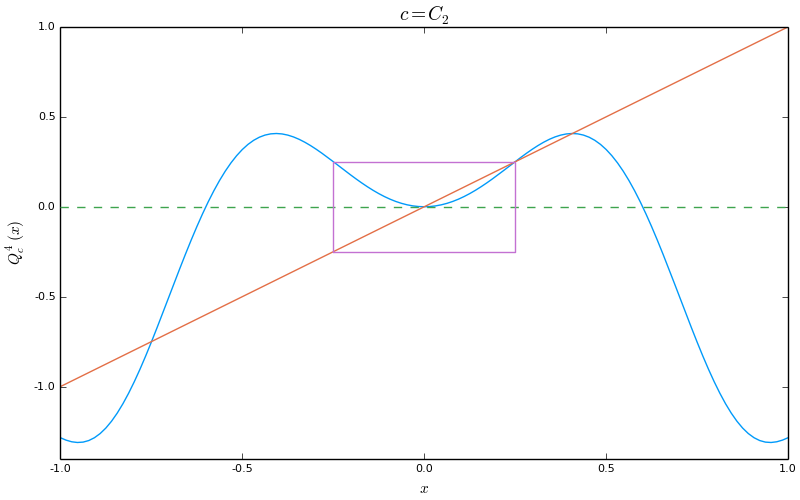

In [78]:
xrange = -1:1/64:1
plot(xrange, x->Qcⁿ(x, (C2,4)), size=(800,500))
plot!(xrange, x->x)
plot!(xrange, zeros(xrange), line=(:dash))
ylims!(-1.4,1)

x₁ = -0.25
plot!([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])

xlabel!(L"x")
ylabel!(L"Q_c^4(x)")
title!(L"c = C_2")

Nuevamente, el recuadro verde en la gráfica de $C_2$ muestra un detalle de $Q_{C_2}^4(x)$ que, localmente, se *parece* a $Q_{C_0}(x)$. En este casi, la doble reflexión hace que la orientación corresponda.

In [27]:
Q8c = c -> Qcⁿ(0.0, (c, 8))
C3 = roots_newton(Q8c, -1.4)

-1.3815474844320617


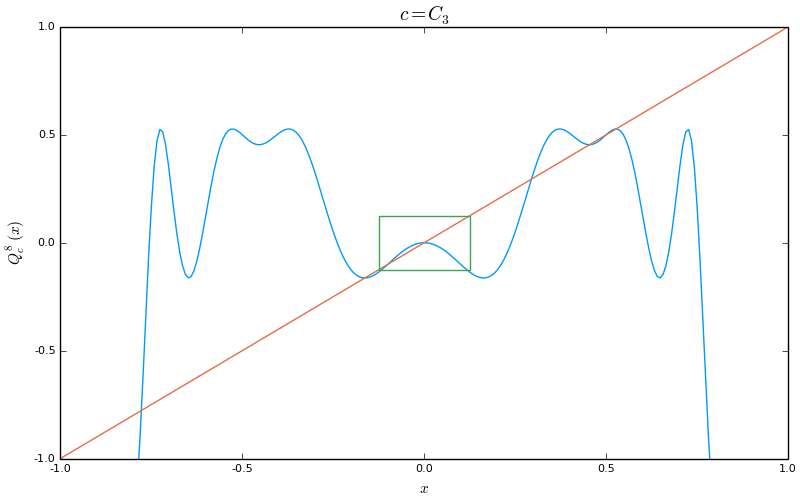

In [82]:
xrange = -1:1/128:1
plot(xrange, x->Qcⁿ(x, (C3,8)), size=(800,500))
plot!(xrange, x->x)
ylims!(-1,1)

x₁ = -0.125
plot!([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])

xlabel!(L"x")
ylabel!(L"Q_c^8(x)")
title!(L"c = C_3")

#ylims!(-0.3, 0.3)
#xlims!(-0.3, 0.3)

**Ejercicio 2:**

Rehacer los cálculos de los exponentes de Feigenbaum,
\begin{eqnarray*}
f_n &=& \frac{C_n-C_{n+1}}{C_{n+1}-C_{n+2}},\\
a_n &=& \frac{d_n}{d_{n+1}},
\end{eqnarray*}

usando los valores $C_n$ donde se tienen ciclos superestables de periodo $2^n$. (Este ejercicio es muy parecido a los ejercicios 1 y 3 de la `Tarea4`.) 

Nota: Es importante dar un punto suficientemente bien aproximado a $C_n$ para que el método de Newton converja bien.

In [56]:
Q16c = c -> Qcⁿ(0.0, (c, 16))
C4 = roots_newton(Q16c, -1.4)

-1.3969453597045607

In [59]:
Q32c = c -> Qcⁿ(0.0, (c, 32))
C5 = roots_newton(Q32c, -1.4)

-1.4002530812147829

In [60]:
Q64c = c -> Qcⁿ(0.0, (c, 64))
C6 = roots_newton(Q64c, -1.4)

-1.400253081214783

In [61]:
Q128c = c -> Qcⁿ(0.0, (c, 128))
C7 = roots_newton(Q128c, -1.4)

-1.400253081214783

In [75]:
C_ss = sort([C0, C1, C2, C3, C4, C5, C6], rev=true)

7-element Array{Float64,1}:
  0.0    
 -1.0    
 -1.3107 
 -1.38155
 -1.39695
 -1.40025
 -1.40025

In [64]:
function feigen_const(A)
    
    B = Float64[]
    
    for i in 1:length(A)- 2
        
        α = abs(A[i] - A[i + 1]) / abs(A[i+1] - A[i+2])
        push!(B, α)
        
    end
    
    B
    
end

feigen_const (generic function with 1 method)

In [76]:
feigen_const(C_ss)

5-element Array{Float64,1}:
 3.21851   
 4.38568   
 4.60095   
 4.65513   
 1.48967e13

### Claudio's way

In [128]:
using DualNumbers

In [129]:
function Qc_n(n)
    
    x = "x^2 + c"

    for i in 1:n-1

        x = "($x)^2 +c"

    end

    ex = parse(x)
    ex_ret = :( (x, c) -> $ex )
    eval(ex_ret)
end

Qc_n (generic function with 1 method)

In [127]:
Qc_n(1)

(anonymous function)

In [140]:
"""
    compute_roots_paso(f::Function, x0, c)

"""
function compute_roots_paso(f::Function, x0, c)
            
    #roots= Float64[c0]
    xi = Dual(x0, 1)

            # 1000 iterations of Newton's method
    for i in 1:10000

        c_2 = realpart(xi) - (realpart(f(xi, c))) / (dualpart(f(xi, c)))
        #push!(roots, c_2)
        ci = Dual(c_2, 1)
    end

    #roots
    realpart(xi)
    
end

"""
    compute_roots(f::Function, xx, c)
    Out: roots

xx is an array, cc is the parameter, f is the funtion

"""
function compute_roots(f::Function, X, c)
    
    roots = similar(X)

    for j in 1:length(X)
            
        xi = Dual(X[j], 1)

        for k in 1:100
            x_2 = realpart(xi) - (realpart(f(xi, c)) - realpart(xi)) / (dualpart(f(xi, c)) - 1) 
            xi = Dual(x_2, 1)
        end

        roots[j] = realpart(xi)
        
    end
    
    roots
end

compute_roots (generic function with 1 method)

In [139]:
X0[end-5]

0.5

In [156]:
X0 = collect(-2:0.5:2)

compute_roots(Qc_n(2^2), X0, C2)

9-element Array{Float64,1}:
 -1.70199    
 -1.3107     
 -1.14486    
 -1.3107     
  4.44089e-16
  0.407239   
 -1.64654    
  1.74928    
  1.74928    

In [88]:
Q1c = c -> Qcⁿ(0.0, (c, 1))
C0 = roots_newton(Q1c, -1.4)

0.0

In [102]:
Q2x = x -> Qcⁿ(x, (C0, 2))

(anonymous function)

In [109]:
roots_newton_Id(Qc_n(1), 0.5, C0)

NaN

**Ejercicio 3:**

Comparar gráficamente los mapeos $Q_{c}(x)$ y $Q_{c^\prime}^2(x)$ para $c=1/4, 0, -3/4, -1, -2, -2.2$ y $c^\prime=-3/4,-1,-5/4,-1.3, -1.546\dots, -1.65$. 


**Ejercicio 4:**

Estudiar la dinámica para $c=-2.2$

- ¿Cómo se caracteriza el valor al que tiende *casi* cualquier condición inicial en el
intervalo $I=[-p_+,p_+]$ (donde $p_+$ es el valor positivo tal que $Q_c(p_+)=p_+$), después de muchos iterados? (El intervalo $I$ es donde "toda la dinámica interesante ocurre".)

- ¿Qué condición se requiere, en términos de $I$ (y de los iterados de $Q_c(x)$, para que se cumpla el inciso anterior?

- Caracterizen al complemento del conjunto de los casos anteriores, es decir, cuando los iterados de la condición inicial **no** llegan a donde *casi* cualquier condición inicial termina. ¿Cómo se conoce a este conjunto?

**Ejercicio 5:**

- Usando el análisis gráfico para un valor de $c$ *ligeramente* anterior al punto donde se observa la ventana de periodo 3 para la familia $Q_c(x)$, y uno en la ventana de periodo 3, concluyan el tipo de bifurcación que se observa.

- Comparen la dinámica para ambos valores de $c$ del inciso anterior. ¿Cómo es el exponente de Liapunov en cada caso?

- Encuentren el valor de $c$ donde se da el ciclo superestable de periodo 3. (Nuevamente, ayuden al método de Newton con una buena semilla inicial para $c$.) Demuestren que para este valor de $c$ el mapeo $Q_c^3(x)$ tiene *ocho* puntos fijos, donde dos de ellos son puntos fijos de $Q_c(x)$, y los otros 6 forman dos secuencias periódicas, de periodo 3 en $Q_c(x)$, una de ellas estable y la otra inestable.

(Los siguientes incisos usan el valor de $c$ encontrado en el inciso anterior.)

- Denotando al ciclo inestable de periodo 3 como $\alpha\mapsto \beta\mapsto\gamma$, con $\gamma<\beta<\alpha$, uno puede asociar a cada uno de estos valores un valor $\hat\alpha, \hat\beta, \hat\gamma$, tales que $Q_c^3(\hat\alpha)=\alpha$, $Q_c^3(\hat\beta)=\beta$, $Q_c^3(\hat\gamma)=\gamma$. ¿Qué podemos concluir de un punto que cae en cualquiera de los intervalos $[\alpha,\hat\alpha]$, $[\beta,\hat\beta]$ y $[\hat\gamma,\gamma]$, en términos de los iterados sucesivos?

- Definiendo los intervalos $I_0=[\hat\beta, \alpha]$, $I_1=[\gamma,\beta]$, mostrar que bajo la acción de $Q_c(x)$ se cumple: (i) $Q_c(I_0) \supset I_1$, y (ii) $Q_c(I_1) \supset I_0\cup I_1$. ¿Qué propiedad *importante* de $Q_c(x)$ se utiliza aquí?

(Los intervalos $I_0$ e $I_1$, y estas propiedades, son básicos en la demostración del teorema "periodo tres implica caos".)

## Constante $\alpha$ de Feigenbaum

El punto del análisis gráfico anterior es que, *localmente*, los mapeos $Q_{C_0}(x)$ y $Q^{2^n}_{C_n}(x)$ son muy similares, si uno se enfoca en un dominio muy particular para $Q^{2^n}_{C_n}(x)$.

Vale la pena notar que, en este caso, la distancia al punto fijo (que cruza la identidad) 
y que define los recuadros verdes, es $d_n = Q_{C_n}^{2^{n-1}}(0)\approx -\alpha d_{n+1}$ (ver ejercicio 3 de la Tarea 4).

Esta observación se expresa de manera formal construyendo una función que localmente se comporta como $Q^{2^n}_{C_n}(x)$:

\begin{equation}
g_1(x) = \lim_{n\to\infty} (-\alpha)^n Q_{C_{n+1}}^{2^n}\Big(\frac{x}{(-\alpha)^n}\Big).
\end{equation}

El límite $n\to\infty$ hace que todas las particularidades del mapeo $Q_c(x)$ se pierdan y, en este sentido, que sólo las propiedades que son *universales* resten.

La ecuación anterior se generaliza a:

\begin{equation}
g_i(x) = \lim_{n\to\infty} (-\alpha)^n Q_{C_{n+i}}^{2^n}\Big(\frac{x}{(-\alpha)^n}\Big),
\end{equation}




De la definición de $g_i(x)$, uno puede demostrar las funciones $g_i(x)$ satisfacen la ecuación

\begin{equation}
g_{i-1}(x) = -\alpha g_i\Big( g_i(-\,\frac{x}{\alpha})\Big) ,
\end{equation}

que al tomar el límite $i\to \infty$ nos lleva a:

\begin{equation}
g(x) \equiv T g(x) = -\alpha g\Big( g(-\,\frac{x}{\alpha})\Big),
\end{equation}

donde $T$ es el *operador de doblamiento de periodo*.


Si $g(x)$ satisface la ecuación anterior, entonces la función $\mu g(x/\mu)$, con $\mu\neq 0$, es también solución de la ecuación. Esta es una propiedad de escalamiento. De aquí, imponiendo que $g(0)=1$ se tiene $1=-\alpha g(1)$.

La idea es hacer un desarrollo en serie de Taylor de $g(x)$ cerca de $x=0$ a fin de obtener una aproximación de $\alpha$. De la ecuación de doblamiento de periodo uno obtiene:

\begin{eqnarray}
g'(x) &=& g'\Big( g(-\,\frac{x}{\alpha}) \Big) g'(-\,\frac{x}{\alpha}),\\
g''(x) &=& -g''\Big( g(-\,\frac{x}{\alpha}) \Big) \Big[ g'(-\,\frac{x}{\alpha})\Big]^2
-\,\frac{1}{\alpha} g'\Big( g(-\,\frac{x}{\alpha}) \Big) g''(-\,\frac{x}{\alpha}).
\end{eqnarray}


De la primer ecuación podemos concluir que $g'(0)=0$. Por esto, a segundo orden tenemos que $g(x)\simeq 1+b x^2$. Sustituyendo esta aproximación en la ecuación de doblamiento de periodo y desarrollando *hasta* segundo orden, se obtiene:

\begin{equation}
1+b x^2 \simeq -\alpha(1+b(1+b(-\frac{x}{\alpha})^2)^2) = -\alpha\Big( 1+ b + \frac{2b^2}{\alpha^2}x^2\Big) + {\cal O}(x^4).
\end{equation}


Igualando término a término (potencias de $x$) tenemos que se debe satisfacer:

\begin{eqnarray}
1 &=& -\alpha(1 + b),\\
b &=& - 2b^2/\alpha.\\
\end{eqnarray}

De aquí obtenemos: $b \approx -\alpha/2$ y $\alpha\approx 1+\sqrt{3}=2.73\dots$; el valor de 
esta constante es $\alpha = 2.502907\dots$.

La otra constante de Feigenbaum se obtiene estudiando las propiedades de la ecuación linearizada en $c$.

## Referencias

Heinz Georg Schuster, Wolfram Just, Deterministic Chaos, 2006.